# gradient descent



In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
m = 100 # number of samples
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

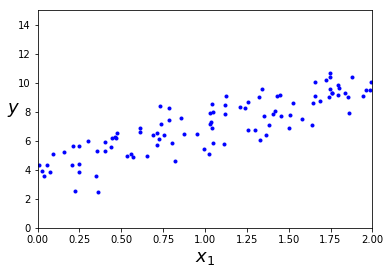

In [24]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
# save_fig("generated_data_plot")
plt.show()

In [25]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [26]:
theta_best

array([[4.11428608],
       [2.88069172]])

In [27]:

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.11428608],
       [9.87566953]])

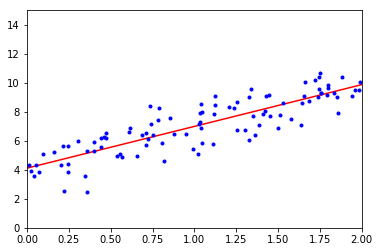

In [28]:

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

In [44]:
## batch gradient descent

eta = 0.1 #learning rate
n_iterations = 1000


theta = np.random.randn(2,1)

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta -= eta * gradients

In [45]:
theta

array([[4.11428608],
       [2.88069172]])

# stochastic gradient descent

In [51]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/ (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta -= learning_schedule(n_epochs * m + i) * gradients

In [50]:
theta

array([[3.67928972],
       [3.22820532]])

# mini batch gradient descent



In [55]:
n_epochs = 50
t0, t1 = 5, 50
minibatch_size = 20

def learning_schedule(t):
    return t0/ (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    
    for i in range(0, m, minibatch_size):
        
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        theta -= learning_schedule(n_epochs * m + i) * gradients

In [56]:
theta

array([[3.93869417],
       [3.02394326]])